##POC QUENDA: Análisis exploratorio y predicción del tiempo de espera en citas oficina de Alicante##

**Tecnologías Plexus S.L.**<br>
**Plexus Data Technologies**<br>
<br>
- ***Autor: Antonio Sotomayor Sola***
- ***Fecha: 18-Diciembre-2018***

####1.0. Lectura de los ficheros csv que continen los datos de las tablas exportadas:

#####1.1. Lectura del fichero csv que contiene los datos exportados de la tabla citasHistoricas:

In [4]:
from pyspark.sql.types import *

# Creación del schema para el dataframe
citas_df_schema = StructType(
[StructField('idCita', IntegerType()),
 StructField('idEstado', IntegerType()),
 StructField('idPuesto', IntegerType()),
 StructField('idServicio', IntegerType()),
 StructField('idUsuario', IntegerType()),
 StructField('fechaCita', TimestampType()),
 StructField('tiempoEspera', IntegerType()),
 StructField('tiempoAtencion', IntegerType())
])

# Lectura del dataset ratings aplicando el ratings_df_schema
citasHis_df = spark.read.format('com.databricks.spark.csv')                                                                         \
              .options(inferSchema=False, delimiter = ';', nullValue='NA', header=True, multiLine=True, encoding='UTF-8')         \
              .schema(citas_df_schema)                                                                                          \
              .load('/FileStore/tables/alicanteNew.csv')

# salvando en cache el dataframes
citasHis_df.show()

+------+--------+--------+----------+---------+-------------------+------------+--------------+
idCita|idEstado|idPuesto|idServicio|idUsuario| fechaCita|tiempoEspera|tiempoAtencion|
+------+--------+--------+----------+---------+-------------------+------------+--------------+
165284| 4| 431| 186| 990|2017-07-21 13:04:30| 217| 29|
165274| 4| 430| 185| 977|2017-07-21 12:40:42| 74| 9|
165271| 4| 432| 185| 1108|2017-07-21 12:36:28| 27| 38|
165264| 4| 432| 186| 1108|2017-07-21 12:28:36| 539| 579|
165263| 4| 434| 182| 978|2017-07-21 12:28:19| 1848| 512|
165262| 4| 432| 182| 1108|2017-07-21 12:28:05| 1699| 829|
165261| 4| 430| 186| 977|2017-07-21 12:27:42| 581| 273|
165257| 4| 433| 182| 1037|2017-07-21 12:21:11| 1891| 624|
165256| 4| 432| 185| 1108|2017-07-21 12:20:03| 289| 70|
165255| 4| 432| 185| 1108|2017-07-21 12:19:50| 263| 38|
165254| 4| 432| 182| 1108|2017-07-21 12:19:36| 1704| 503|
165253| 4| 432| 182| 1108|2017-07-21 12:19:13| 1698| 21|
165252| 4| 431| 186| 990|2017-07-21 12:18:48| 484| 2470|
165251| 4| 432| 182| 1108|2017-07-21 12:17:30| 1785| 13|
165250| 4| 433| 182| 1037|2017-07-21 12:14:03| 1743| 575|
165249| 4| 430| 182| 977|2017-07-21 12:13:50| 1738| 766|
165248| 4| 430| 182| 977|2017-07-21 12:13:14| 1735| 38|
165247| 4| 432| 186| 1108|2017-07-21 12:12:55| 802| 636|
165246| 4| 469| 182| 984|2017-07-21 12:12:11| 1467| 830|
165245| 4| 435| 182| 1034|2017-07-21 12:10:49| 1347| 61|
+------+--------+--------+----------+---------+-------------------+------------+--------------+
only showing top 20 rows

In [5]:
citasHis_df.count()

Out[ 139 ]: 41224

In [6]:
from pyspark.sql.functions import *
citasHis_df = citasHis_df.dropna().sort(asc("fechaCita"))
citasHis_df.count()

Out[ 140 ]: 41224

Obtención de las columnas "mes", "dia", "hora" a partir de la columna fecha del dataframe:

In [8]:
from pyspark.sql.functions import *

citasHis_df = citasHis_df \
.withColumn("mes", month(citasHis_df.fechaCita)) \
.withColumn("dia", dayofweek(citasHis_df.fechaCita)) \
.withColumn("hora", hour(citasHis_df.fechaCita))

citasHis_df.show()

+------+--------+--------+----------+---------+-------------------+------------+--------------+---+---+----+
idCita|idEstado|idPuesto|idServicio|idUsuario| fechaCita|tiempoEspera|tiempoAtencion|mes|dia|hora|
+------+--------+--------+----------+---------+-------------------+------------+--------------+---+---+----+
 29652| 4| 430| 182| 985|2017-02-09 15:55:47| 6| 94| 2| 5| 15|
 29653| 4| 430| 182| 985|2017-02-09 15:56:51| 628| 7| 2| 5| 15|
 29654| 4| 430| 183| 985|2017-02-09 15:56:55| 32| 33| 2| 5| 15|
 29656| 4| 433| 185| 983|2017-02-09 15:58:15| 65754| 65902| 2| 5| 15|
 29657| 4| 430| 186| 985|2017-02-09 16:00:35| 411| 2| 2| 5| 16|
 29658| 4| 430| 186| 985|2017-02-09 16:00:38| 410| 274| 2| 5| 16|
 29659| 4| 430| 185| 985|2017-02-09 16:05:54| 368| 3| 2| 5| 16|
 29660| 4| 430| 182| 985|2017-02-09 16:06:02| 650| 14| 2| 5| 16|
 29662| 4| 430| 185| 985|2017-02-09 16:07:25| 581| 7| 2| 5| 16|
 29663| 4| 430| 185| 985|2017-02-09 16:08:06| 547| 8| 2| 5| 16|
 29664| 4| 430| 186| 985|2017-02-09 16:11:23| 358| 2| 2| 5| 16|
 29665| 4| 430| 182| 985|2017-02-09 16:21:02| 21| 1653| 2| 5| 16|
 29666| 4| 430| 182| 985|2017-02-09 16:21:06| 1670| 2| 2| 5| 16|
 29667| 4| 430| 182| 985|2017-02-09 16:21:18| 1662| 4| 2| 5| 16|
 29668| 4| 430| 182| 985|2017-02-09 16:27:59| 1265| 3| 2| 5| 16|
 29669| 4| 430| 182| 985|2017-02-09 16:39:49| 558| 2| 2| 5| 16|
 29670| 4| 430| 187| 985|2017-02-09 16:40:40| 498| 2| 2| 5| 16|
 29671| 4| 430| 182| 985|2017-02-09 16:46:44| 145| 2| 2| 5| 16|
 29673| 4| 430| 182| 985|2017-02-09 16:47:31| 104| 242| 2| 5| 16|
 29674| 4| 430| 182| 985|2017-02-09 16:47:36| 367| 53| 2| 5| 16|
+------+--------+--------+----------+---------+-------------------+------------+--------------+---+---+----+
only showing top 20 rows

#####1.2. Lectura del fichero csv que contiene los datos exportados de la tabla servicios:

In [10]:
from pyspark.sql.types import *

# Creación del schema para el dataframe
servicios_df_schema = StructType(
[StructField('idServicio', IntegerType()),
 StructField('auxServicio', StringType()),
])

# Lectura del dataset ratings aplicando el ratings_df_schema
servicios_df = spark.read.format('com.databricks.spark.csv')                                                                         \
              .options(inferSchema=False, delimiter = ';', nullValue='NA', header=True, multiLine=True, encoding='UTF-8')         \
              .schema(servicios_df_schema)                                                                                          \
              .load('/FileStore/tables/servicios1.csv')

# salvando en cache el dataframes
servicios_df.show()

+----------+--------------------+
idServicio| auxServicio|
+----------+--------------------+
 175| Recojo el vehículo|
 176| Mostrador Exprés|
 177|Devuelvo el vehículo|
 178| Otras gestiones|
 179|INCLUIDO EN MI RE...|
 180|PAGAR 30E POR MOS...|
 181| Prueba|
 182| I HAVE A BOOKING|
 183|TENGO SERVICIO EX...|
 184|DEVUELVO EL VEHÍCULO|
 185| NO TENGO RESERVA|
 186|I HAVE EXPRESS BO...|
 187|I WANT EXPRESS LI...|
 188| TENGO UNA RESERVA.|
 189|TENGO SERVICIO EX...|
 190|DEVUELVO EL VEHÍCULO|
 191| NO TENGO RESERVA.|
 192|TENGO RESERVA EXP...|
 193|I WANT EXPRESS LI...|
 194| TENGO UNA RESERVA|
+----------+--------------------+
only showing top 20 rows

#####1.3. Lectura del fichero csv que contiene los datos exportados de la tabla usuarios:

In [12]:
from pyspark.sql.types import *

# Creación del schema para el dataframe
usuarios_df_schema = StructType(
[StructField('idUsuario', IntegerType()),
 StructField('usuario', StringType()),
 StructField('nombre', StringType()),
 StructField('perfil', StringType())
])

# Lectura del dataset ratings aplicando el ratings_df_schema
usuarios_df = spark.read.format('com.databricks.spark.csv')                                                                         \
              .options(inferSchema=False, delimiter = ';', nullValue='NA', header=True, multiLine=True, encoding='UTF-8')         \
              .schema(usuarios_df_schema)                                                                                          \
              .load('/FileStore/tables/usuarios.csv')

# salvando en cache el dataframes
usuarios_df.show(truncate = 80)

+---------+------------------+----------------+---------------------+
idUsuario| usuario| nombre| perfil|
+---------+------------------+----------------+---------------------+
 1| plexus| null|administrador general|
 959| ibiza_admin| Rafael Aguilar|administrador general|
 970| carolina.miranda|Carolina Miranda|administrador general|
 977| francisco.tortosa| Tolti| Atención y recepción|
 980| alberto.deltell| null| Atención y recepción|
 988| corina.necula| Angry Bird| Atención y recepción|
 996| argiñe.osuna| Argi| Atención y recepción|
 997| patricia.nuñez| Patricia| Atención y recepción|
 998| estefania.pradere| Estefanía| Atención y recepción|
 999| anabel.ramon| Sirenita| Atención y recepción|
 1000| aura.gaitan| Aura| Atención y recepción|
 1001| carmen.mulet| Flamenca| Atención y recepción|
 1002| elena.diez| Elena Díez| Atención y recepción|
 1003| elena.parra| Parra| Atención y recepción|
 1004| fabiola.huhn| Fabiola| Atención y recepción|
 1005| helena.wen| Xini| Atención y recepción|
 1006| liliana.voroneanu| Liliana| Atención y recepción|
 1008|margarita.carvajal| Xurri| Atención y recepción|
 1009| melania.mulet| La rabbit| Atención y recepción|
 1011| maria.rubio| Mica| Atención y recepción|
+---------+------------------+----------------+---------------------+
only showing top 20 rows

#####1.4. Comprobación de valores NULL en columnas numéricas para dataframe citasHisotricas:

In [14]:
def count_nulls(citasHis_df):
    null_counts = []          
    for col in citasHis_df.dtypes:    
        cname = col[0]        
        ctype = col[1]        
        if ctype != 'string': 
            nulls = citasHis_df.where( citasHis_df[cname].isNull() ).count()
            result = tuple([cname, nulls])  
            null_counts.append(result)
    return null_counts

null_counts = count_nulls(citasHis_df)

null_counts

Out[ 144 ]: 
[('idCita', 0),
 ('idEstado', 0),
 ('idPuesto', 0),
 ('idServicio', 0),
 ('idUsuario', 0),
 ('fechaCita', 0),
 ('tiempoEspera', 0),
 ('tiempoAtencion', 0),
 ('mes', 0),
 ('dia', 0),
 ('hora', 0)]

#####1.5. Estudio del número de citas por mes, día y hora:

Número de Citas por hora:

In [17]:
hora_df = citasHis_df.groupBy("hora").agg(count("idCita").alias("citas/hora")).sort(asc("hora"))
hora_pd = hora_df.toPandas()
hora_df.show()

+----+----------+
hora|citas/hora|
+----+----------+
 0| 905|
 1| 242|
 2| 68|
 3| 25|
 4| 5|
 6| 10|
 7| 68|
 8| 1068|
 9| 2979|
 10| 4331|
 11| 3932|
 12| 3059|
 13| 2498|
 14| 2489|
 15| 3236|
 16| 2758|
 17| 1890|
 18| 1908|
 19| 2401|
 20| 2353|
+----+----------+
only showing top 20 rows

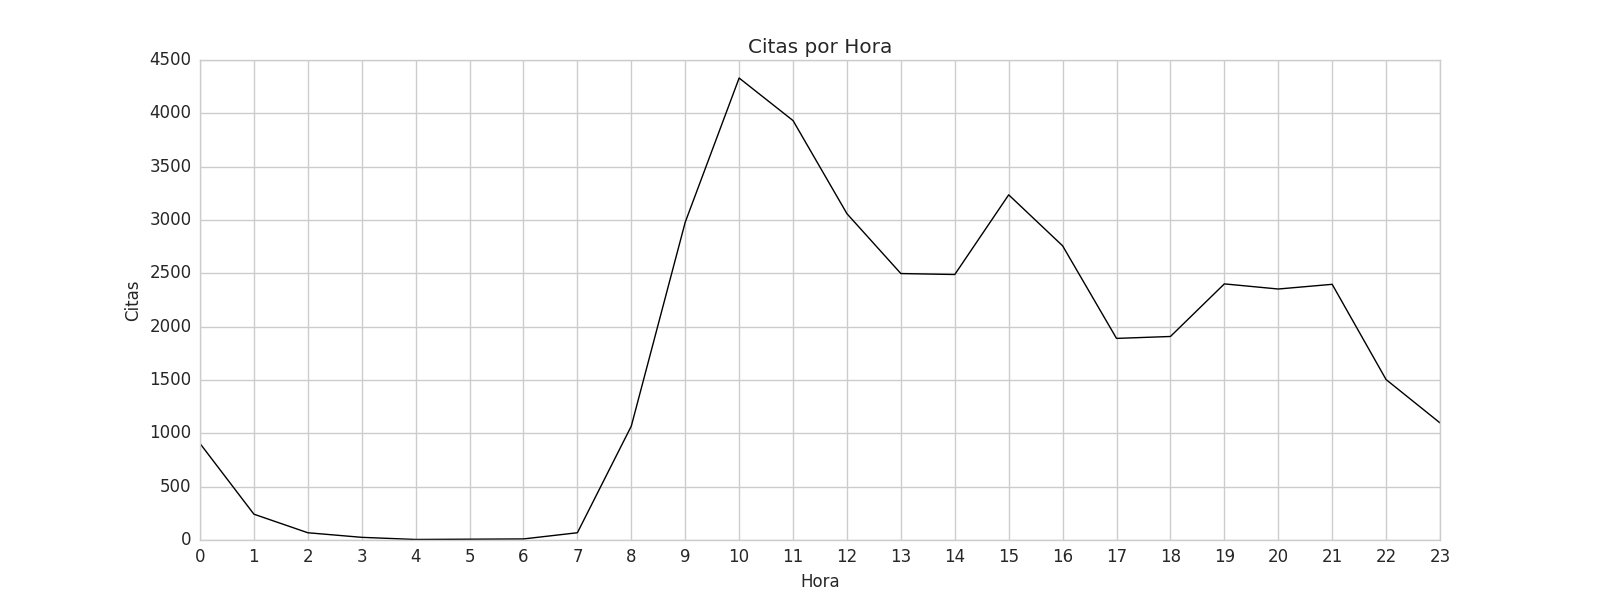

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")


# Citas por hora
#plt.subplot(3, 1, 1)
hora_pd.plot(kind="line", x='hora', y='citas/hora', legend=False, fontsize=12, color='k', xticks = range(0,24))
plt.xticks(rotation='horizontal')
#plt.axis('tight')
plt.xlabel('Hora')
plt.ylabel('Citas')
plt.title('Citas por Hora')

display()
plt.gcf().clear()

Número de citas por día de la semana:

In [20]:
dia_df = citasHis_df.groupBy("dia").agg(count("idCita").alias("citas/dia")).sort(asc("dia"))
dia_pd = dia_df.toPandas()
dia_df.show()

+---+---------+
dia|citas/dia|
+---+---------+
 1| 5534|
 2| 5678|
 3| 6008|
 4| 5960|
 5| 5988|
 6| 5510|
 7| 6546|
+---+---------+

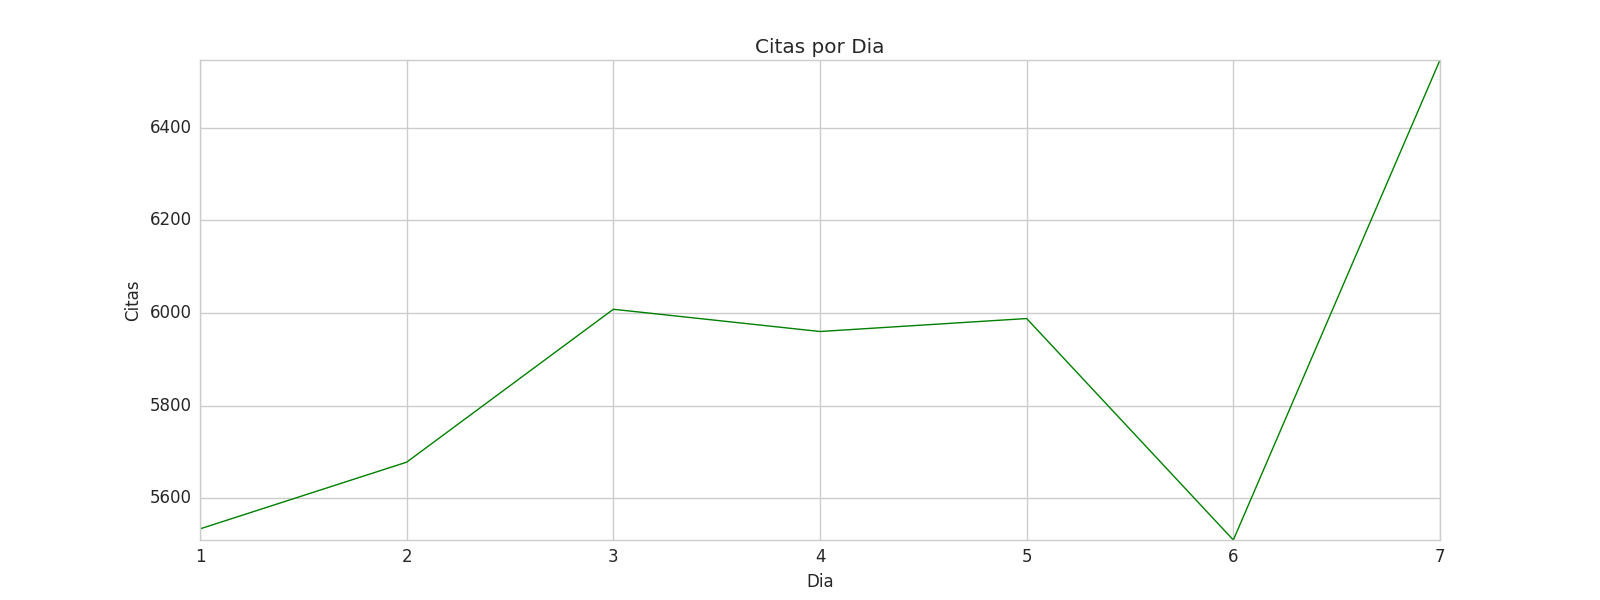

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")


# Citas por dia
plt.subplot(3, 1, 1)
dia_pd.plot(kind="line", x='dia', y='citas/dia', legend=False, fontsize=12, color='g')
plt.xticks(rotation='horizontal')
plt.axis('tight')
plt.xlabel('Dia')
plt.ylabel('Citas')
plt.title('Citas por Dia')

display()
plt.gcf().clear()

Número de citas por mes del año:

In [23]:
mes_df = citasHis_df.groupBy("mes").agg(count("idCita").alias("citas/mes")).sort(asc("mes"))
mes_pd = mes_df.toPandas()
mes_df.show()

+---+---------+
mes|citas/mes|
+---+---------+
 2| 3272|
 3| 5066|
 4| 6538|
 5| 7530|
 6| 11343|
 7| 7475|
+---+---------+

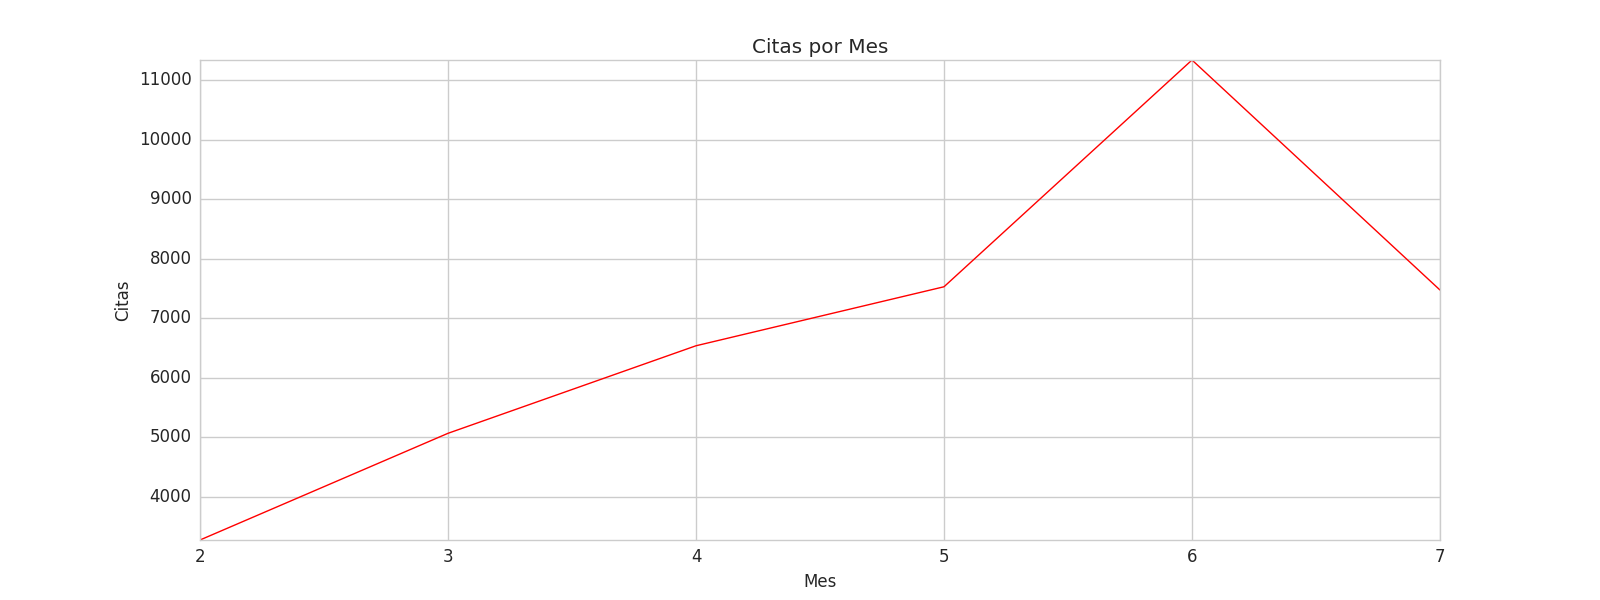

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")


# Citas por mes
mes_pd.plot(kind="line", x='mes', y='citas/mes', legend=False, fontsize=12, color='r')
plt.xticks(rotation='horizontal')
plt.axis('tight')
plt.xlabel('Mes')
plt.ylabel('Citas')
plt.title('Citas por Mes')

display()
plt.gcf().clear()

####2.0. Estudio de la evolución en el tiempo de la variable tiempoEspera.

Creación de un Pandas dataframe para el análisis exploratorio:

In [27]:
#import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

pandas_df = citasHis_df.toPandas()
pandas_df.head(5)

Out[ 151 ]: 
 idCita idEstado idPuesto idServicio idUsuario fechaCita \
0 29652 4 430 182 985 2017-02-09 15:55:47 
1 29653 4 430 182 985 2017-02-09 15:56:51 
2 29654 4 430 183 985 2017-02-09 15:56:55 
3 29656 4 433 185 983 2017-02-09 15:58:15 
4 29657 4 430 186 985 2017-02-09 16:00:35 

 tiempoEspera tiempoAtencion mes dia hora 
0 6 94 2 5 15 
1 628 7 2 5 15 
2 32 33 2 5 15 
3 65754 65902 2 5 15 
4 411 2 2 5 16

Creación de una función **time_series** para poder representar la variable tiempoEspera frente al tiempo:

In [29]:
def time_series(start, end):
    time_series_df = pandas_df[['fechaCita', 'tiempoEspera']][(pandas_df['fechaCita'] >= start) & (pandas_df['fechaCita'] <= end)]
    x = time_series_df.fechaCita
    y = time_series_df.tiempoEspera
    plt.plot(x,y)
    #plt.axis('tight')
    plt.xlabel('Time')
    plt.ylabel('TiempoEspera')
    plt.title('TiempoEspera Time Series')
    plt.tight_layout()
    return plt.show();

Ejecución de la función **time_series** para la variable tiempoEspera para el año 2017:

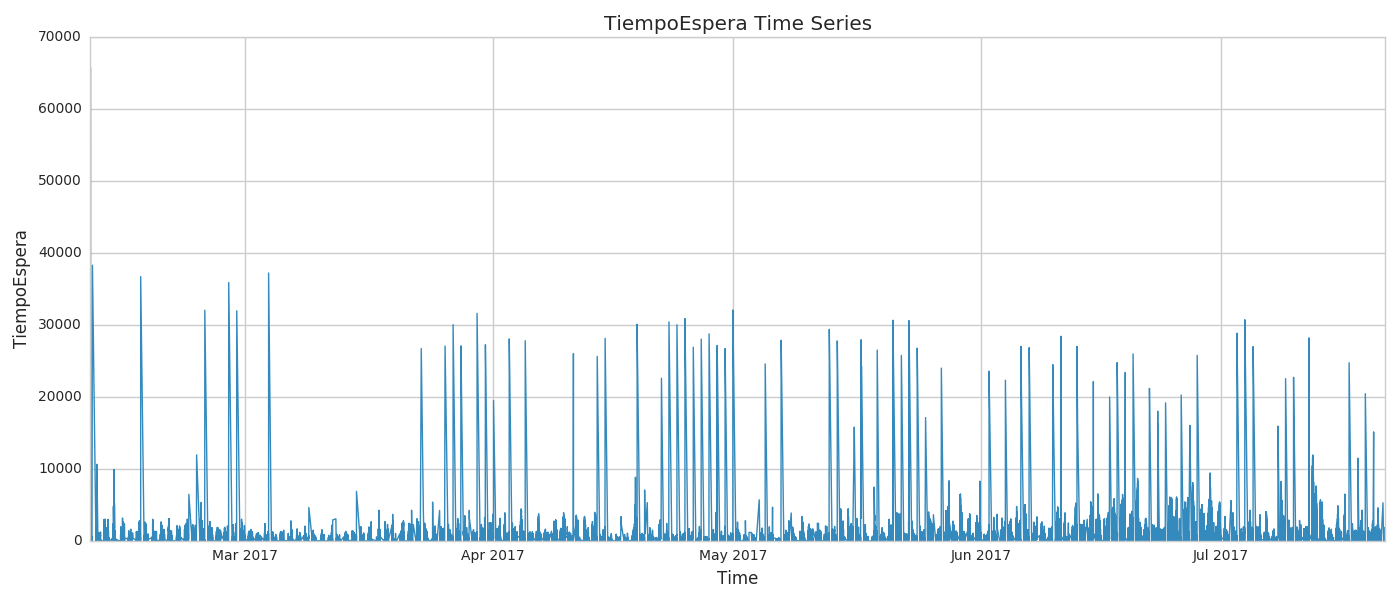

In [31]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")

# tiempoEspera for 2011-2012
plt.subplot(1, 1, 1)
time_series('2017-02-01','2017-07-31')

display()
plt.gcf().clear()

In [32]:
pandas_df.tiempoEspera.mean()

Out[ 154 ]: 1102.3229672035707

####3.0. Representación de las diferentes variables frente a timepoEspera con el objetivo de detectar relaciones entre ellas.

#####3.1. Variables temporales "puesto", "servicio", "usuario", "tiempoAtencion":

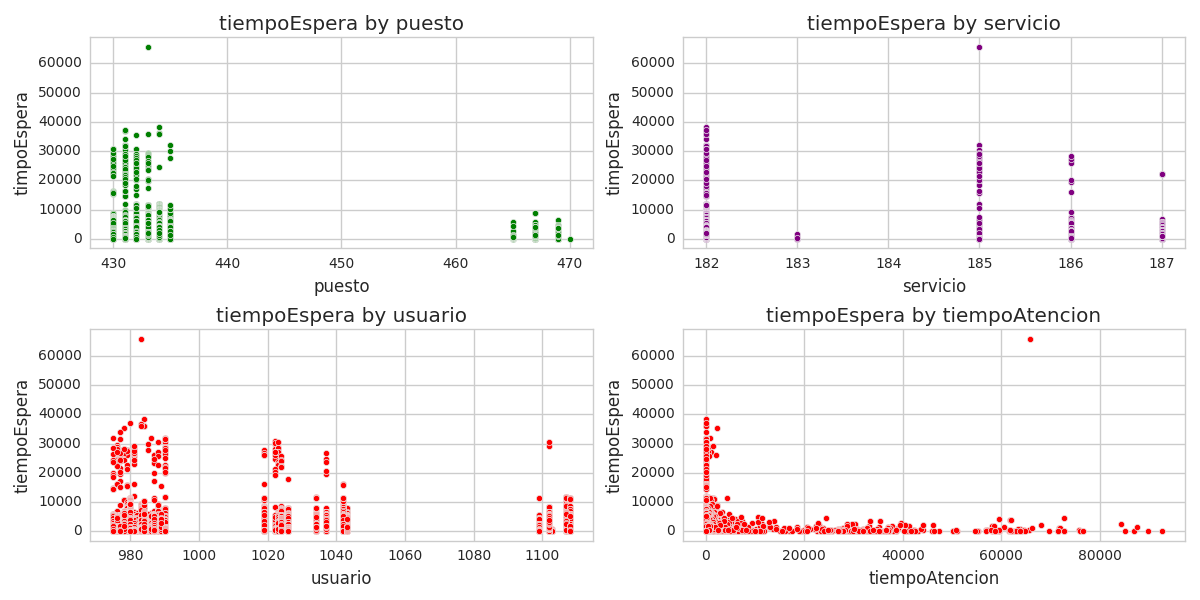

In [35]:
plt.figure(figsize=(12,6))

# Scatter plot timpoEspera-puesto
x = pandas_df['idPuesto']
y = pandas_df['tiempoEspera']
plt.subplot(2, 2, 1)
plt.scatter(x,y, c='#008000')
plt.axis('tight')
plt.xlabel('puesto')
plt.ylabel('timpoEspera')
plt.title('tiempoEspera by puesto')

# Scatter plot tiempoEspera-servicio
x = pandas_df['idServicio']
y = pandas_df['tiempoEspera']
plt.subplot(2, 2, 2)
plt.scatter(x,y, c='#800080')
plt.axis('tight')
plt.xlabel('servicio')
plt.ylabel('timpoEspera')
plt.title('tiempoEspera by servicio')

# Scatter plot timpoEspera-usuario
x = pandas_df['idUsuario']
y = pandas_df['tiempoEspera']
plt.subplot(2, 2, 3)
plt.scatter(x,y, c='r')
plt.axis('tight')
plt.xlabel('usuario')
plt.ylabel('tiempoEspera')
plt.title('tiempoEspera by usuario')

# Scatter plot timpoEspera-tiempoAtencion
x = pandas_df['tiempoAtencion']
y = pandas_df['tiempoEspera']
plt.subplot(2, 2, 4)
plt.scatter(x,y, c='r')
plt.axis('tight')
plt.xlabel('tiempoAtencion')
plt.ylabel('tiempoEspera')
plt.title('tiempoEspera by tiempoAtencion')
plt.tight_layout()

display()
plt.gcf().clear()

#####3.2. idServicio vs avg_timepoEspera:

In [37]:
from pyspark.sql.functions import *
servicio = citasHis_df.groupBy("idServicio").agg(round(avg("tiempoEspera"),2).alias("avg_tiempoEspera")).sort(desc("avg_tiempoEspera"))
servicio.show()

+----------+----------------+
idServicio|avg_tiempoEspera|
+----------+----------------+
 182| 1258.88|
 187| 974.98|
 183| 583.8|
 185| 454.54|
 186| 452.8|
+----------+----------------+

In [38]:
servicio.select("idServicio").distinct().count()

Out[ 157 ]: 5

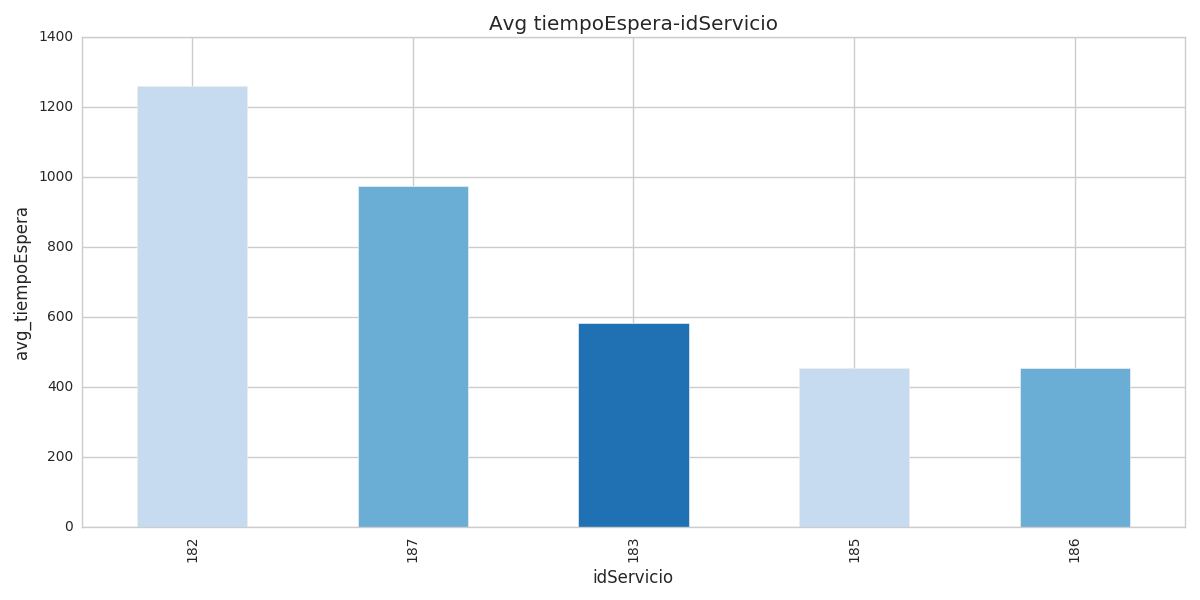

In [39]:
plt.rcParams["figure.figsize"] = [12,6]

# convert to pandas dataframe
data_pd = servicio.toPandas()

# Gráfico de barras
objects = data_pd['idServicio']
x = np.arange(len(objects))
 
data_pd['avg_tiempoEspera'].plot.bar(color=sns.color_palette("Blues",3), align='center')
plt.xticks(x, objects, rotation='vertical')

plt.xlabel('idServicio')
plt.ylabel('avg_tiempoEspera')
plt.title('Avg tiempoEspera-idServicio')
plt.tight_layout()

display()
plt.gcf().clear()


In [40]:
servicios_df.where(servicios_df.idServicio == 182).show(truncate =50)

+----------+----------------+
idServicio| auxServicio|
+----------+----------------+
 182|I HAVE A BOOKING|
+----------+----------------+

In [41]:
servicios_df.show(truncate=50)

+----------+------------------------------------+
idServicio| auxServicio|
+----------+------------------------------------+
 175| Recojo el vehículo|
 176| Mostrador Exprés|
 177| Devuelvo el vehículo|
 178| Otras gestiones|
 179| INCLUIDO EN MI RESERVA|
 180| PAGAR 30E POR MOSTRADOR EXPRÉS|
 181| Prueba|
 182| I HAVE A BOOKING|
 183| TENGO SERVICIO EXPRÉS|
 184| DEVUELVO EL VEHÍCULO|
 185| NO TENGO RESERVA|
 186|I HAVE EXPRESS BOOKING (RECORD ONLY)|
 187| I WANT EXPRESS LINE (30 EUROS)|
 188| TENGO UNA RESERVA.|
 189| TENGO SERVICIO EXPRÉS|
 190| DEVUELVO EL VEHÍCULO|
 191| NO TENGO RESERVA.|
 192|TENGO RESERVA EXPRESS (SÓLO RECORD).|
 193| I WANT EXPRESS LINE (30 EUROS)|
 194| TENGO UNA RESERVA|
+----------+------------------------------------+
only showing top 20 rows

#####3.3. idPuesto vs avg_timepoEspera:

In [43]:
citasHis_df.select("idPuesto").distinct().count()

Out[ 161 ]: 10

In [44]:
from pyspark.sql.functions import *
puesto = citasHis_df.groupBy("idPuesto").agg(round(avg("tiempoEspera"),2).alias("avg_tiempoEspera")).sort(desc("avg_tiempoEspera"))
puesto.show()

+--------+----------------+
idPuesto|avg_tiempoEspera|
+--------+----------------+
 434| 1525.78|
 467| 1506.34|
 435| 1417.17|
 469| 1411.03|
 433| 1201.89|
 432| 1028.94|
 431| 997.74|
 430| 935.27|
 465| 908.22|
 470| 108.0|
+--------+----------------+

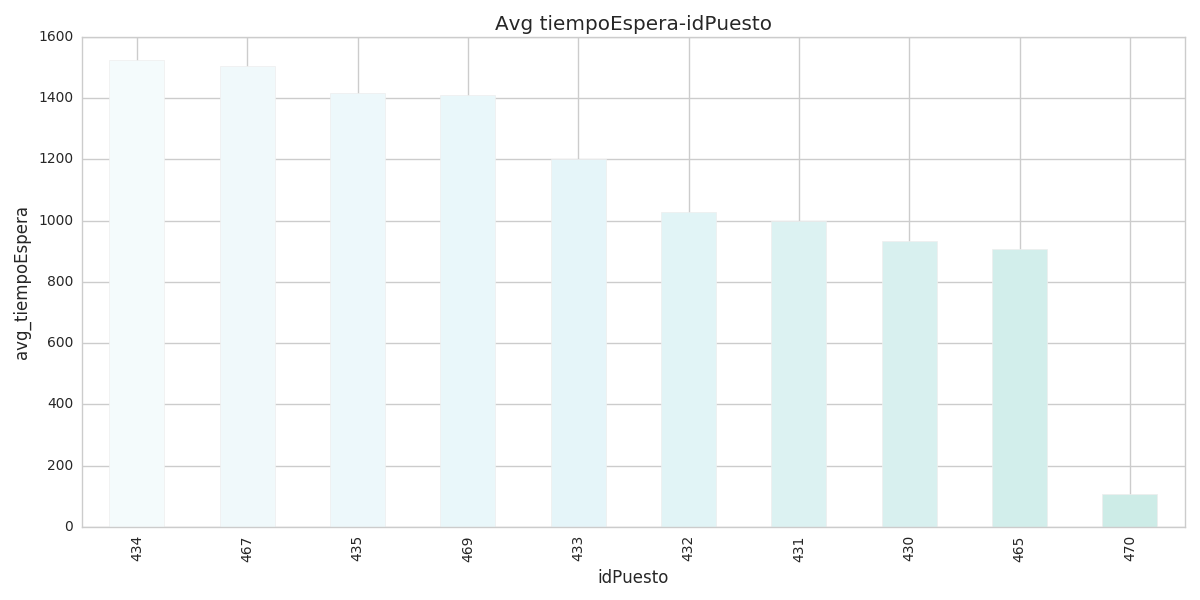

In [45]:
plt.rcParams["figure.figsize"] = [12,6]

# convert to pandas dataframe
data2_pd = puesto.toPandas()

# Gráfico de barras
objects = data2_pd['idPuesto']
x = np.arange(len(objects))
 
data2_pd['avg_tiempoEspera'].plot.bar(color=sns.color_palette("BuGn",40), align='center')
plt.xticks(x, objects, rotation='vertical')

plt.xlabel('idPuesto')
plt.ylabel('avg_tiempoEspera')
plt.title('Avg tiempoEspera-idPuesto')
plt.tight_layout()

display()
plt.gcf().clear()

In [46]:
from pyspark.sql.functions import *
puesto_servicio = citasHis_df.join(servicios_df, citasHis_df.idServicio == servicios_df.idServicio).select("idPuesto", citasHis_df.idServicio, "tiempoEspera", "auxServicio").where(citasHis_df.idPuesto == 434)
puesto_servicio.show(70, truncate=50)

+--------+----------+------------+------------------------------------+
idPuesto|idServicio|tiempoEspera| auxServicio|
+--------+----------+------------+------------------------------------+
 434| 182| 38292| I HAVE A BOOKING|
 434| 182| 36066| I HAVE A BOOKING|
 434| 182| 35984| I HAVE A BOOKING|
 434| 182| 549| I HAVE A BOOKING|
 434| 182| 155| I HAVE A BOOKING|
 434| 182| 388| I HAVE A BOOKING|
 434| 182| 381| I HAVE A BOOKING|
 434| 186| 320|I HAVE EXPRESS BOOKING (RECORD ONLY)|
 434| 185| 251| NO TENGO RESERVA|
 434| 182| 257| I HAVE A BOOKING|
 434| 186| 324|I HAVE EXPRESS BOOKING (RECORD ONLY)|
 434| 182| 2| I HAVE A BOOKING|
 434| 182| 7| I HAVE A BOOKING|
 434| 182| 8| I HAVE A BOOKING|
 434| 186| 441|I HAVE EXPRESS BOOKING (RECORD ONLY)|
 434| 182| 720| I HAVE A BOOKING|
 434| 186| 277|I HAVE EXPRESS BOOKING (RECORD ONLY)|
 434| 182| 2626| I HAVE A BOOKING|
 434| 182| 2373| I HAVE A BOOKING|
 434| 185| 604| NO TENGO RESERVA|
 434| 182| 173| I HAVE A BOOKING|
 434| 185| 181| NO TENGO RESERVA|
 434| 182| 180| I HAVE A BOOKING|
 434| 182| 678| I HAVE A BOOKING|
 434| 182| 664| I HAVE A BOOKING|
 434| 182| 285| I HAVE A BOOKING|
 434| 185| 4| NO TENGO RESERVA|
 434| 182| 76| I HAVE A BOOKING|
 434| 182| 288| I HAVE A BOOKING|
 434| 182| 535| I HAVE A BOOKING|
 434| 182| 806| I HAVE A BOOKING|
 434| 185| 518| NO TENGO RESERVA|
 434| 182| 38| I HAVE A BOOKING|
 434| 182| 25| I HAVE A BOOKING|
 434| 182| 35| I HAVE A BOOKING|
 434| 182| 481| I HAVE A BOOKING|
 434| 182| 140| I HAVE A BOOKING|
 434| 182| 423| I HAVE A BOOKING|
 434| 182| 969| I HAVE A BOOKING|
 434| 182| 1282| I HAVE A BOOKING|
 434| 182| 1296| I HAVE A BOOKING|
 434| 182| 1266| I HAVE A BOOKING|
 434| 182| 1461| I HAVE A BOOKING|
 434| 182| 2058| I HAVE A BOOKING|
 434| 182| 1489| I HAVE A BOOKING|
 434| 182| 1093| I HAVE A BOOKING|
 434| 182| 913| I HAVE A BOOKING|
 434| 182| 1035| I HAVE A BOOKING|
 434| 182| 1139| I HAVE A BOOKING|
 434| 182| 1184| I HAVE A BOOKING|
 434| 182| 1156| I HAVE A BOOKING|
 434| 182| 1533| I HAVE A BOOKING|
 434| 182| 577| I HAVE A BOOKING|
 434| 182| 360| I HAVE A BOOKING|
 434| 182| 10| I HAVE A BOOKING|
 434| 182| 519| I HAVE A BOOKING|
 434| 185| 462| NO TENGO RESERVA|
 434| 182| 691| I HAVE A BOOKING|
 434| 182| 1071| I HAVE A BOOKING|
 434| 182| 855| I HAVE A BOOKING|
 434| 185| 165| NO TENGO RESERVA|
 434| 182| 63| I HAVE A BOOKING|
 434| 182| 45| I HAVE A BOOKING|
 434| 185| 385| NO TENGO RESERVA|
 434| 182| 221| I HAVE A BOOKING|
 434| 186| 165|I HAVE EXPRESS BOOKING (RECORD ONLY)|
 434| 182| 1360| I HAVE A BOOKING|
 434| 182| 560| I HAVE A BOOKING|
 434| 182| 241| I HAVE A BOOKING|
 434| 182| 383| I HAVE A BOOKING|
+--------+----------+------------+------------------------------------+
only showing top 70 rows

#####3.3. idUsuario vs avg_timepoEspera:

In [48]:
citasHis_df.select("idUsuario").distinct().count()

Out[ 165 ]: 30

In [49]:
from pyspark.sql.functions import *
usuario = citasHis_df.groupBy("idUsuario").agg(round(avg("tiempoEspera"),2).alias("avg_tiempoEspera")).sort(desc("avg_tiempoEspera"),desc("idUsuario"))
usuario.show(70)

+---------+----------------+
idUsuario|avg_tiempoEspera|
+---------+----------------+
 1107| 2257.41|
 1108| 2207.56|
 984| 1920.22|
 1037| 1718.17|
 1042| 1696.68|
 1099| 1582.76|
 1102| 1547.41|
 980| 1468.77|
 1024| 1300.72|
 985| 1268.23|
 978| 1267.16|
 1023| 1220.78|
 1019| 1215.89|
 1034| 1121.84|
 989| 1119.2|
 988| 1081.29|
 983| 1054.36|
 990| 1036.8|
 1043| 1031.37|
 975| 1030.0|
 1026| 987.07|
 979| 978.62|
 987| 969.47|
 986| 936.63|
 1022| 914.56|
 977| 841.2|
 981| 820.53|
 976| 820.19|
 982| 659.36|
 1103| 144.1|
+---------+----------------+

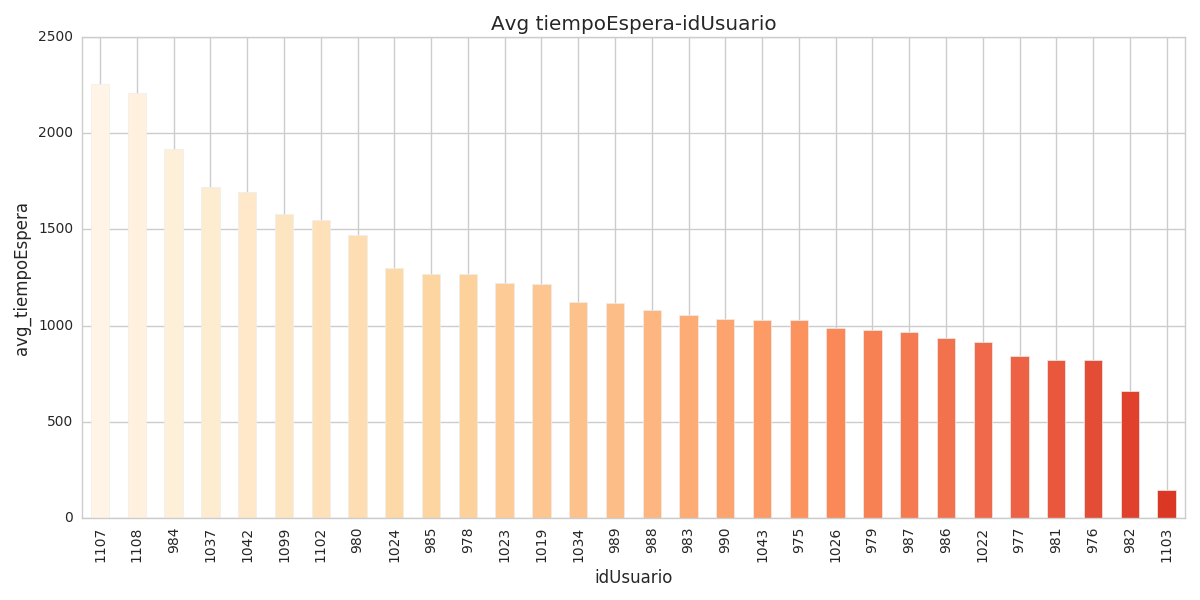

In [50]:
plt.rcParams["figure.figsize"] = [12,6]

# convert to pandas dataframe
data3_pd = usuario.toPandas()

# Gráfico de barras
objects = data3_pd['idUsuario']
x = np.arange(len(objects))
 
data3_pd['avg_tiempoEspera'].plot.bar(color=sns.color_palette("OrRd",40), align='center')
plt.xticks(x, objects, rotation='vertical')

plt.xlabel('idUsuario')
plt.ylabel('avg_tiempoEspera')
plt.title('Avg tiempoEspera-idUsuario')
plt.tight_layout()

display()
plt.gcf().clear()

In [51]:
from pyspark.sql.functions import *
usuarios_df.where(usuarios_df.idUsuario == 1107).show()

+---------+-----------+------+--------------------+
idUsuario| usuario|nombre| perfil|
+---------+-----------+------+--------------------+
 1107|pedro.gomez| null|Atención y recepción|
+---------+-----------+------+--------------------+

Conversión del dataframe filtrado a un pandas dataframe:

In [53]:
#import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

pandas_df = citasHis_df.toPandas()
pandas_df.head(5)

Out[ 168 ]: 
 idCita idEstado idPuesto idServicio idUsuario fechaCita \
0 29652 4 430 182 985 2017-02-09 15:55:47 
1 29653 4 430 182 985 2017-02-09 15:56:51 
2 29654 4 430 183 985 2017-02-09 15:56:55 
3 29656 4 433 185 983 2017-02-09 15:58:15 
4 29657 4 430 186 985 2017-02-09 16:00:35 

 tiempoEspera tiempoAtencion mes dia hora 
0 6 94 2 5 15 
1 628 7 2 5 15 
2 32 33 2 5 15 
3 65754 65902 2 5 15 
4 411 2 2 5 16

####4.0. Matriz de Correlación.

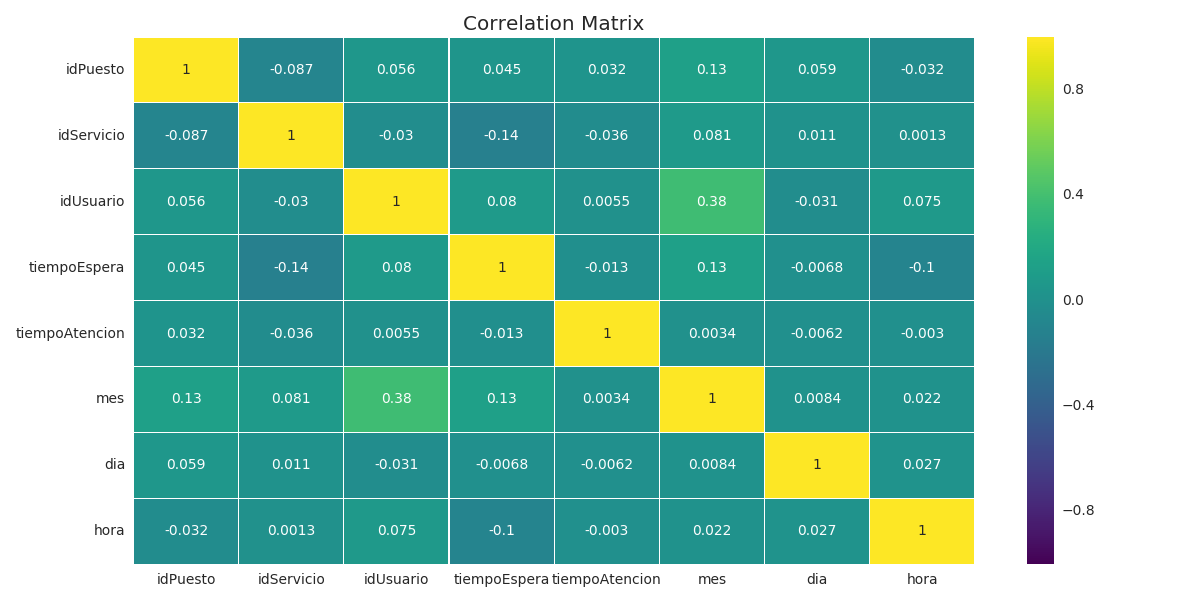

In [55]:
# Creación dataframe para matriz
correlation_df = pandas_df.drop(['idCita', 'idEstado', 'fechaCita'], axis=1)

# Generación matriz de correlación de Pearson
cor=correlation_df.corr(method='pearson')

# Cisualización matriz
cm=plt.cm.viridis
sns.heatmap(cor,cmap=cm,linewidths=0.1,linecolor='white',annot=True)
plt.title('Correlation Matrix')
plt.tight_layout()

display()
plt.gcf().clear()

In [56]:
from pyspark.sql.functions import *
puesto_servicio = citasHis_df.groupBy("idPuesto", "idServicio").count().sort(desc("idPuesto"), desc("idServicio"))
puesto_servicio.join(servicios_df, puesto_servicio.idServicio == servicios_df.idServicio).select("idPuesto", servicios_df.idServicio, "count", "auxServicio"). show(truncate=50)
puesto_servicio_pd = puesto_servicio.toPandas()

+--------+----------+-----+------------------------------------+
idPuesto|idServicio|count| auxServicio|
+--------+----------+-----+------------------------------------+
 470| 185| 1| NO TENGO RESERVA|
 469| 182| 118| I HAVE A BOOKING|
 467| 182| 176| I HAVE A BOOKING|
 465| 186| 2|I HAVE EXPRESS BOOKING (RECORD ONLY)|
 465| 182| 30| I HAVE A BOOKING|
 435| 187| 71| I WANT EXPRESS LINE (30 EUROS)|
 435| 186| 314|I HAVE EXPRESS BOOKING (RECORD ONLY)|
 435| 185| 135| NO TENGO RESERVA|
 435| 183| 1| TENGO SERVICIO EXPRÉS|
 435| 182| 1691| I HAVE A BOOKING|
 434| 187| 23| I WANT EXPRESS LINE (30 EUROS)|
 434| 186| 149|I HAVE EXPRESS BOOKING (RECORD ONLY)|
 434| 185| 213| NO TENGO RESERVA|
 434| 182| 3480| I HAVE A BOOKING|
 433| 187| 75| I WANT EXPRESS LINE (30 EUROS)|
 433| 186| 393|I HAVE EXPRESS BOOKING (RECORD ONLY)|
 433| 185| 530| NO TENGO RESERVA|
 433| 182| 5962| I HAVE A BOOKING|
 432| 187| 176| I WANT EXPRESS LINE (30 EUROS)|
 432| 186| 988|I HAVE EXPRESS BOOKING (RECORD ONLY)|
+--------+----------+-----+------------------------------------+
only showing top 20 rows

###5.0. Modelos de Regresión para la predicción de tiempoEspera.
- 5.1. Modelo de Regresión Lineal con validación cruzada.
- 5.2. Modelo Decision Trees con validación cruzada.
- 5.3. Modelo Random Forest con validación cruzada.
- 5.4. Modelo Gradient Boosting Trees (GBT) con validación cruzada.

Para la evaluación del ajuste de los diferentes modelos de regresión se empleará el RMSE obtenido para cada uno de ellos.

Creación modelos de entrenamiento y test:

In [59]:
# Creación de dataset de entrenamiento y test
(training_DF, test_DF) = citasHis_df.randomSplit([.7, .3])

In [60]:
# Datframe de entrenamiento
#training_DF = citasHis_df.filter((citasHis_df['fechaCita'] >= '2017-02-01 00:00:00') & (citasHis_df['fechaCita'] <= '2017-05-30 23:59:59'))

# Dataframe para test
#test_DF = citasHis_df.filter(citasHis_df['fechaCita'] >= '2017-06-31 23:59:59')

In [61]:
training_DF.count()

Out[ 173 ]: 28917

In [62]:
test_DF.count()

Out[ 174 ]: 12307

Se realiza un ensamblado de los predictores en un vector features y su posterior escalado en un vector scaledFeatures y se crean los conjuntos de entrenamiento y test para los modelos:

In [64]:
from pyspark.ml import Pipeline 
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.feature import Params
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler

# Ensamblado y scalado de features
vector = VectorAssembler(inputCols=["idPuesto", "idServicio", "idUsuario", "tiempoAtencion", "mes", "dia", "hora"], outputCol="features")
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=False, withMean=True)
  
# Creación de listas para métricas
rmse_models =[]
mse_values =[]
mae_values =[]
r2_values =[]


####5.1. Modelo de Regresión Lineal con validación cruzada.

In [66]:
# Regresión lineal con Validación Cruzada
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline 


# Creación del modelo de LR: Ajuste con k-fold y grid de parámetros
lr = LinearRegression(labelCol="tiempoEspera", featuresCol="scaledFeatures")

# Pipeline
stages = [vector, scaler, lr]
pipeline = Pipeline(stages=stages)

# Grid de parámetros
lrgrid = ParamGridBuilder() \
.addGrid(lr.maxIter, [10]) \
.addGrid(lr.regParam, [0.0, 0.01, 0.05, 0.5]) \
.addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
.build()

# Evaluador del modelo
evaluator = RegressionEvaluator(labelCol="tiempoEspera")


# Cross validation model
cv = CrossValidator(estimator=pipeline,  
                         estimatorParamMaps=lrgrid,
                         evaluator=evaluator,
                         numFolds=3)

# Entrenamiento del modelo
cvModel = cv.fit(training_DF)


# Predicciones sobre conjunto de test
prediccion_tiempoEsperaLRcv = cvModel.transform(test_DF)
prediccion_tiempoEsperaLRcv.cache()

# Mejores parámetros modelo
bestPipeline = cvModel.bestModel
bestLRModel = bestPipeline.stages[2]
bestParams = bestLRModel.extractParamMap()

# Aplicamos el evaluador para conocer el error en el dataset de test y entrenamiento
print "RMSE en test: {0}".format(evaluator.evaluate(prediccion_tiempoEsperaLRcv,{evaluator.metricName: "rmse"}))
print "RMSE en training: {0}".format(evaluator.evaluate(cvModel.transform(training_DF), {evaluator.metricName: "rmse"}))

# Almacenado de Root Mean Square Error
rmse = evaluator.evaluate(prediccion_tiempoEsperaLRcv, {evaluator.metricName: "rmse"})
rmse_models.append(rmse)

# Almacenado de coefficient of determination
r2 = evaluator.evaluate(prediccion_tiempoEsperaLRcv, {evaluator.metricName: "r2"})
r2_values.append(r2)
print("r2: %.3f" %r2) 

RMSE en test: 1955.41018116
RMSE en training: 2089.07761966
r2: 0.048

###5.2. Modelo Decision Trees con validación cruzada.

In [68]:
# Decision Trees with cross validation
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Creación del modelo de DT
dt = DecisionTreeRegressor(labelCol="tiempoEspera", featuresCol="features")

# Pipeline
stages = [vector, scaler, dt]
pipeline = Pipeline(stages=stages)

# Grid de parámetros
dtgrid = ParamGridBuilder() \
.addGrid(dt.maxDepth, [30]) \
.build()


# Evaluador del modelo
evaluator = RegressionEvaluator(labelCol="tiempoEspera")

# Cross validation model
cv = CrossValidator(estimator=pipeline,  
                         estimatorParamMaps=dtgrid,
                         evaluator=evaluator,
                         numFolds=3)

# Entrenamiento del modelo
cvModel = cv.fit(training_DF)


# Realizamos la predicción sobre el conjunto de test
prediccion_tiempoEsperaDTcv = cvModel.transform(test_DF)
prediccion_tiempoEsperaDTcv.cache()

# Mejores parámetros modelo
bestPipeline = cvModel.bestModel
bestDTModel = bestPipeline.stages[2]
bestParams = bestDTModel.extractParamMap()

# Aplicamos el evaluador para conocer el error en el dataset de test y entrenamiento
print "RMSE en test: {0}".format(evaluator.evaluate(prediccion_tiempoEsperaDTcv,{evaluator.metricName: "rmse"}))
print "RMSE en training: {0}".format(evaluator.evaluate(cvModel.transform(training_DF), {evaluator.metricName: "rmse"}))

# Almacenado de Root Mean Square Error
rmse = evaluator.evaluate(prediccion_tiempoEsperaDTcv, {evaluator.metricName: "rmse"})
rmse_models.append(rmse)

# Almacenado de coefficient of determination
r2 = evaluator.evaluate(prediccion_tiempoEsperaDTcv, {evaluator.metricName: "r2"})
r2_values.append(r2)
print("r2: %.3f" %r2) 

RMSE en test: 2012.14811293
RMSE en training: 168.579294151
r2: -0.008

###5.3. Modelo Random Forest con validación cruzada.

In [70]:
# Random Forest
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Creación del modelo de RF
rf = RandomForestRegressor(labelCol="tiempoEspera", featuresCol="features")

# Pipeline
stages = [vector, scaler, rf]
pipeline = Pipeline(stages=stages)

# Grid de parámetros
rfgrid = ParamGridBuilder() \
.addGrid(rf.maxDepth, [20]) \
.addGrid(rf.maxBins, [50]) \
.build()


#Evaluador del modelo
evaluator = RegressionEvaluator(labelCol="tiempoEspera")

# Cross validation model
cv = CrossValidator(estimator=pipeline,  
                         estimatorParamMaps=rfgrid,
                         evaluator=evaluator,
                         numFolds=3)

# Entrenamiento del modelo
cvModel = cv.fit(training_DF)

# Mejores parámetros modelo
bestPipeline = cvModel.bestModel
bestRFModel = bestPipeline.stages[2]
bestParams = bestRFModel.extractParamMap()


# Realizamos la predicción sobre el conjunto de test
prediccion_tiempoEsperaRFcv = cvModel.transform(test_DF)
prediccion_tiempoEsperaRFcv.cache()

# Aplicamos el evaluador para conocer el error en el dataset de test y entrenamiento
print "RMSE en test: {0}".format(evaluator.evaluate(prediccion_tiempoEsperaRFcv,{evaluator.metricName: "rmse"}))
print "RMSE en training: {0}".format(evaluator.evaluate(cvModel.transform(training_DF), {evaluator.metricName: "rmse"}))

# Almacenado de Root Mean Square Error
rmse = evaluator.evaluate(prediccion_tiempoEsperaRFcv, {evaluator.metricName: "rmse"})
rmse_models.append(rmse)

# Almacenado de coefficient of determination
r2 = evaluator.evaluate(prediccion_tiempoEsperaRFcv, {evaluator.metricName: "r2"})
r2_values.append(r2)
print("r2: %.3f" %r2) 

RMSE en test: 1401.25913707
RMSE en training: 663.930334981
r2: 0.511

####5.4 Modelo Gradient Boosting Trees (GBT) con validación cruzada.

In [72]:
# GBT con ml
from pyspark.ml.regression import GBTRegressor

# Creación del modelo de GBT
gbt = GBTRegressor(labelCol="tiempoEspera", featuresCol="features")

# Pipeline
stages = [vector, scaler, gbt]
pipeline = Pipeline(stages=stages)

# Grid de parámetros
gbtgrid = ParamGridBuilder() \
.addGrid(gbt.maxDepth, [10]) \
.addGrid(gbt.maxBins, [30]) \
.build()

# Evaluador del modelo
evaluator = RegressionEvaluator(labelCol="tiempoEspera")

# Cross validation model
cv = CrossValidator(estimator=pipeline,  
                         estimatorParamMaps=gbtgrid,
                         evaluator=evaluator,
                         numFolds=3)

# Entrenamiento del modelo
cvModel = cv.fit(training_DF)

# Mejores parámetros modelo
bestPipeline = cvModel.bestModel
bestGBTModel = bestPipeline.stages[2]
bestParams = bestGBTModel.extractParamMap()


# Realizamos la predicción sobre el conjunto de test
prediccion_tiempoEsperaGBTcv = cvModel.transform(test_DF)
prediccion_tiempoEsperaGBTcv.cache()

# Aplicamos el evaluador para conocer el error en el dataset de test y entrenamiento
print "RMSE en test: {0}".format(evaluator.evaluate(prediccion_tiempoEsperaGBTcv,{evaluator.metricName: "rmse"}))
print "RMSE en training: {0}".format(evaluator.evaluate(cvModel.transform(training_DF), {evaluator.metricName: "rmse"}))

# Almacenado de Root Mean Square Error
rmse = evaluator.evaluate(prediccion_tiempoEsperaGBTcv, {evaluator.metricName: "rmse"})
rmse_models.append(rmse)

# Almacenado de coefficient of determination
r2 = evaluator.evaluate(prediccion_tiempoEsperaGBTcv, {evaluator.metricName: "r2"})
r2_values.append(r2)
print("r2: %.3f" %r2) 

RMSE en test: 1869.2544011
RMSE en training: 686.59744289
r2: 0.130

####5.5. Comparación y evaluación de modelos.

Se crea un dataframe con los resultados obtenidos del ajuste de los distintos modelos y se representa mediante un gráfico de barras:

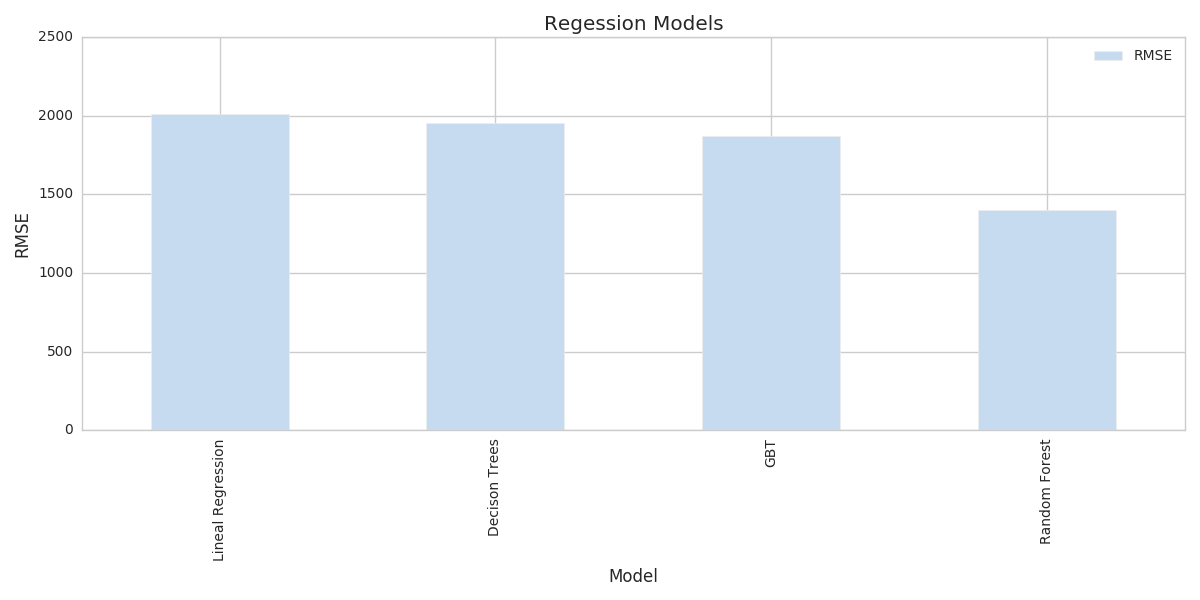

In [75]:
# Creación pandas dataframe models y ordenamiento
objects = ['Lineal Regression', 'Decison Trees', 'GBT', 'Random Forest']
rmse_models_df = pd.DataFrame({'models':objects,'RMSE':rmse_models})
rmse_models_df = rmse_models_df.sort_values('RMSE', ascending=False)

# Gráfico de barras
x = np.arange(len(objects))
 
rmse_models_df.plot.bar(color=sns.color_palette("Blues",3), align='center')
plt.xticks(x, objects, rotation='vertical')

plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Regession Models')
plt.tight_layout()

display()
plt.gcf().clear()

####6.0. Modelo Neural Network Regression

Eliminación de columnas no necesarias y conversión a pandas dataframe:

In [78]:
# Eliminación columnas
citasHis_dfRNN = citasHis_df.drop("idCita", "idEstado", "fechaCita")
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import pandas as pd
pd.options.display.mpl_style = 'default'
pandas_df = citasHis_dfRNN.toPandas()
pandas_df.head(5)

Out[ 181 ]: 
 idPuesto idServicio idUsuario tiempoEspera tiempoAtencion mes dia \
0 430 182 985 6 94 2 5 
1 430 182 985 628 7 2 5 
2 430 183 985 32 33 2 5 
3 433 185 983 65754 65902 2 5 
4 430 186 985 411 2 2 5 

 hora 
0 15 
1 15 
2 15 
3 15 
4 16

In [79]:
pandas_df.index
y = pandas_df['tiempoEspera']
X = pandas_df.drop(['tiempoEspera'], axis=1)

Creación de conjuntos de entrenamiento y test:

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [82]:
X_train.shape, y_train.shape

Out[ 184 ]: ((28856, 7), (28856,))

In [83]:
X_test.shape, y_test.shape

Out[ 185 ]: ((12368, 7), (12368,))

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

Out[ 186 ]: StandardScaler(copy=True, with_mean=True, with_std=True)

In [85]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

In [86]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

Out[ 188 ]: 
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
 beta_2=0.999, early_stopping=False, epsilon=1e-08,
 hidden_layer_sizes=(100,), learning_rate='constant',
 learning_rate_init=0.001, max_iter=200, momentum=0.9,
 nesterovs_momentum=True, power_t=0.5, random_state=None,
 shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
 verbose=False, warm_start=False)

In [87]:
# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score

Out[ 189 ]: 0.10375832324508161

In [88]:
# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

In [89]:
from math import *
# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, nnr_pred))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

# Explained root mean squared error: 1 is perfect prediction
print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, nnr_pred)))

Mean squared error: 4676707.70
Mean absolute error: 1071.59
R-squared: 0.10
RMSE: 2162.57

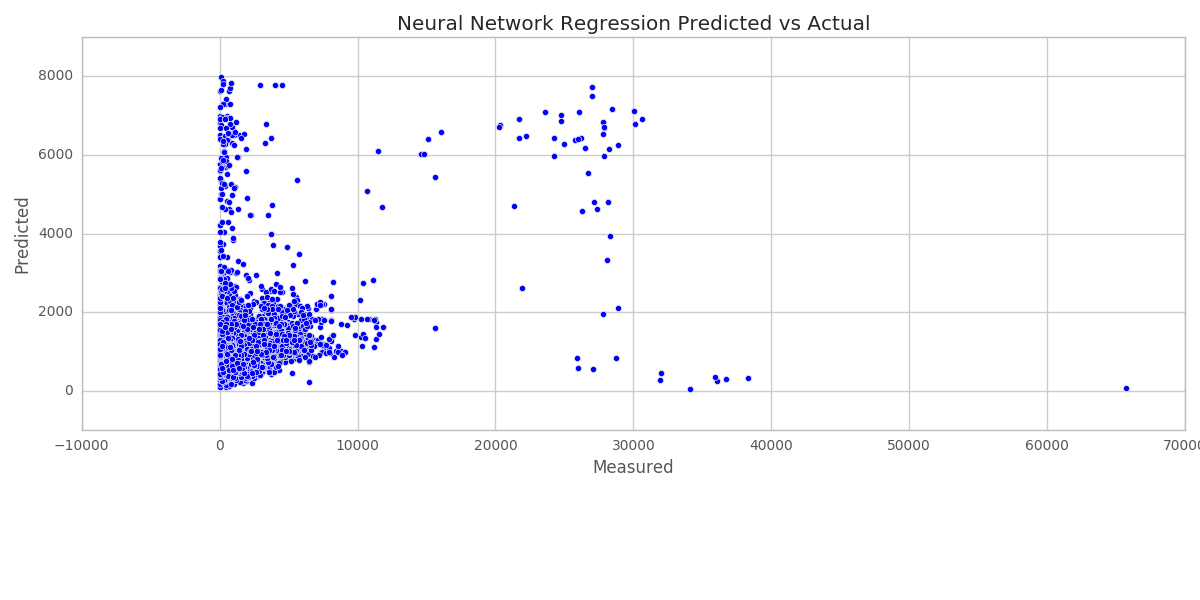

In [90]:
plt.rcParams["figure.figsize"] = [12,6]

plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()
display()
plt.gcf().clear()

####7.0. Modelo autorregesivo ARIMA.

Creación de los dataframes de entrenamiento y test para el modelo ARIMA:

In [93]:
# Datframe de entrenamiento
training_DF = citasHis_df.filter((citasHis_df['fechaCita'] >= '2017-02-01 00:00:00') & (citasHis_df['fechaCita'] <= '2017-05-30 23:59:59'))

# Dataframe para test
test_DF = citasHis_df.filter(citasHis_df['fechaCita'] > '2017-05-30 23:59:59')

In [94]:
# Creación dataframe entrenamiento Random Forest
ARIMA_trainingDf = training_DF.select('fechaCita', 'tiempoEspera')

# Creación dataframe test Random Forest
ARIMA_testDf = test_DF.select('fechaCita', 'tiempoEspera')

ARIMA_trainingDf.show(5)
ARIMA_testDf.show(5)

+-------------------+------------+
 fechaCita|tiempoEspera|
+-------------------+------------+
2017-02-09 15:55:47| 6|
2017-02-09 15:56:51| 628|
2017-02-09 15:56:55| 32|
2017-02-09 15:58:15| 65754|
2017-02-09 16:00:35| 411|
+-------------------+------------+
only showing top 5 rows

+-------------------+------------+
 fechaCita|tiempoEspera|
+-------------------+------------+
2017-05-31 00:01:47| 322|
2017-05-31 00:02:22| 899|
2017-05-31 00:02:59| 867|
2017-05-31 00:07:37| 605|
2017-05-31 00:08:56| 225|
+-------------------+------------+
only showing top 5 rows

Creación de nuevos dataframes para el modelo ARIMA a los que se añade una nueva columna "Udate" tipo timestamp:

In [96]:
from datetime import datetime
from pyspark.sql.functions import *
from pyspark.sql.functions import to_date, to_timestamp

# Se crea dataframe de entrenamiento para modelo ARIMA
citasHis_dfARIMATraining = ARIMA_trainingDf.withColumn("UDate", unix_timestamp(ARIMA_trainingDf['fechaCita'], "yyyy-MM-dd hh:mm:ss"))

# Se crea dataframe de test para modelo ARIMA
citasHis_dfARIMATest = ARIMA_testDf.withColumn("UDate", unix_timestamp(ARIMA_testDf['fechaCita'], "yyyy-MM-dd hh:mm:ss"))


citasHis_dfARIMATraining.show(5)
citasHis_dfARIMATest.show(5)

+-------------------+------------+----------+
 fechaCita|tiempoEspera| UDate|
+-------------------+------------+----------+
2017-02-09 15:55:47| 6|1486655747|
2017-02-09 15:56:51| 628|1486655811|
2017-02-09 15:56:55| 32|1486655815|
2017-02-09 15:58:15| 65754|1486655895|
2017-02-09 16:00:35| 411|1486656035|
+-------------------+------------+----------+
only showing top 5 rows

+-------------------+------------+----------+
 fechaCita|tiempoEspera| UDate|
+-------------------+------------+----------+
2017-05-31 00:01:47| 322|1496188907|
2017-05-31 00:02:22| 899|1496188942|
2017-05-31 00:02:59| 867|1496188979|
2017-05-31 00:07:37| 605|1496189257|
2017-05-31 00:08:56| 225|1496189336|
+-------------------+------------+----------+
only showing top 5 rows

Se convierten los dataframes a Pandas dataframes y se ordena por "UDate" se indexan por "datetime" y posteriormente se elimina la columna "Udate":

In [98]:
# Creación Pandas dataframe para entrenamiento
pandas_DFtraining = citasHis_dfARIMATraining.toPandas()
# Ordenación por UDate
pandas_DFtraining = pandas_DFtraining.sort_values(['UDate'])
# Conversión a datetime
pandas_DFtraining['fechaCita'] = pd.to_datetime(pandas_DFtraining['fechaCita'])
# Eminación columna Udate
pandas_DFtraining.drop('UDate',1,inplace=True)


# Creación Pandas dataframe para test
pandas_DFtest = citasHis_dfARIMATest.toPandas()
# Ordenación por UDate
pandas_DFtest = pandas_DFtest.sort_values(['UDate'])
# Conversión a datetime
pandas_DFtest['fechaCita'] = pd.to_datetime(pandas_DFtest['fechaCita'])
# Eminación columna Udate
pandas_DFtest.drop('UDate',1,inplace=True)

pandas_DFtraining.head(5)
pandas_DFtest.head(5)

Out[ 196 ]: 
 fechaCita tiempoEspera
0 2017-05-31 00:01:47 322
1 2017-05-31 00:02:22 899
2 2017-05-31 00:02:59 867
3 2017-05-31 00:07:37 605
4 2017-05-31 00:08:56 225

Visualización del conjunto de entrenamiento:

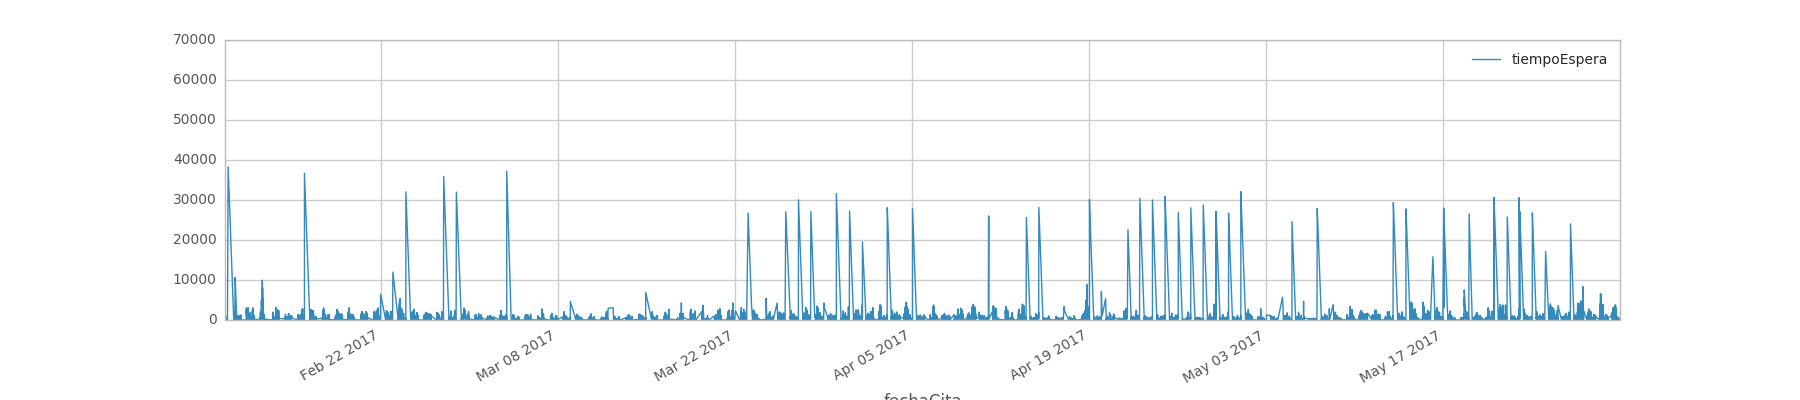

In [100]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig=pandas_DFtraining.plot(x="fechaCita", y="tiempoEspera", figsize=(18,4)) 
display(fig.figure)

Indexación de dataframes de entrenamiento y test por datetime:

In [102]:
# Indexación por datetime
pandas_DFtraining = pandas_DFtraining.set_index('fechaCita')

# Indexación por datetime
pandas_DFtest = pandas_DFtest.set_index('fechaCita')

pandas_DFtraining.index
pandas_DFtest.index

Out[ 198 ]: 
DatetimeIndex(['2017-05-31 00:01:47', '2017-05-31 00:02:22',
 '2017-05-31 00:02:59', '2017-05-31 00:07:37',
 '2017-05-31 00:08:56', '2017-05-31 00:13:38',
 '2017-05-31 00:17:28', '2017-05-31 00:18:20',
 '2017-05-31 00:37:27', '2017-05-31 00:48:52',
 ...
 '2017-07-21 12:19:50', '2017-07-21 12:20:03',
 '2017-07-21 12:21:11', '2017-07-21 12:27:42',
 '2017-07-21 12:28:05', '2017-07-21 12:28:19',
 '2017-07-21 12:28:36', '2017-07-21 12:36:28',
 '2017-07-21 12:40:42', '2017-07-21 13:04:30'],
 dtype='datetime64[ns]', name=u'fechaCita', length=19247, freq=None)

Se aplica el test de Dickey-Fuller para saber si la serie es estacionaria:

In [104]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=365)
    rolstd = pd.rolling_std(timeseries, window=365)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [105]:
test_stationarity(pandas_DFtraining['tiempoEspera'])

Results of Dickey-Fuller Test:
Test Statistic -28.279056
p-value 0.000000
#Lags Used 16.000000
Number of Observations Used 21960.000000
Critical Value (5%) -2.861672
Critical Value (1%) -3.430648
Critical Value (10%) -2.566840
dtype: float64

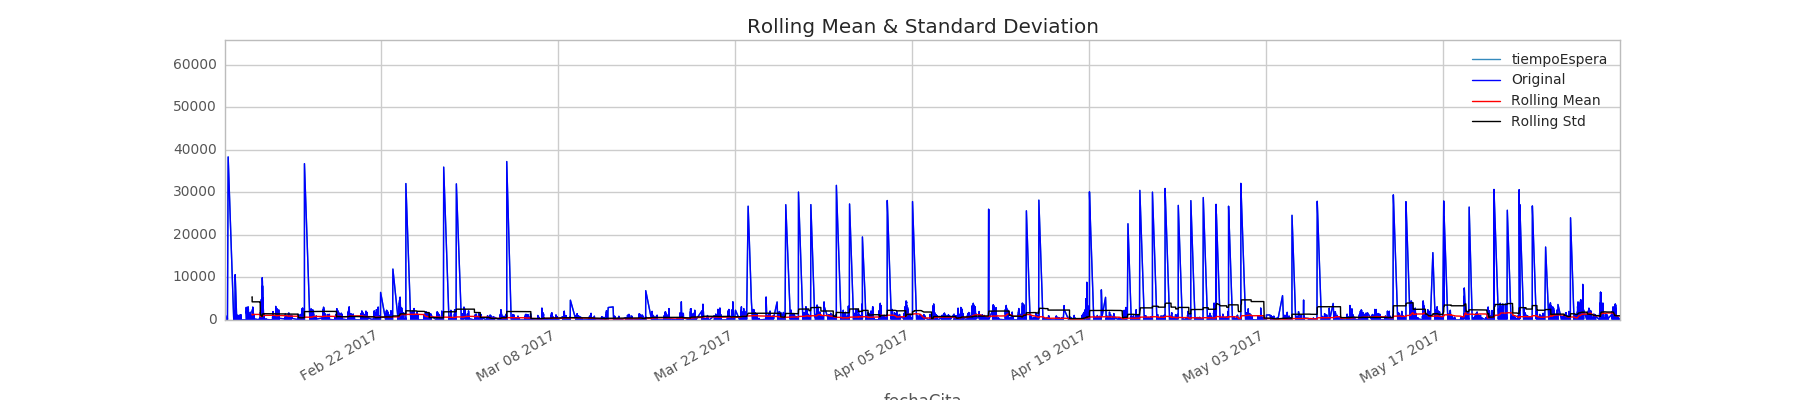

In [106]:
plt.axis('tight')
display()
plt.gcf().clear()

De los resultados del test de Dickey-Fuller se obtine un p-value < 0,05 por lo que se puede afirmar que la serie es estacionaria con un 95% de confianza. Adicionalmente la media y la desviación típica muestran ligeras variaciones pero no se aprecia ninguna tendencia.

Representación de las gráficas de autocorrelación (ACF) y autocorrelación parcial (PACF) para obtener los parámetros del modelo:

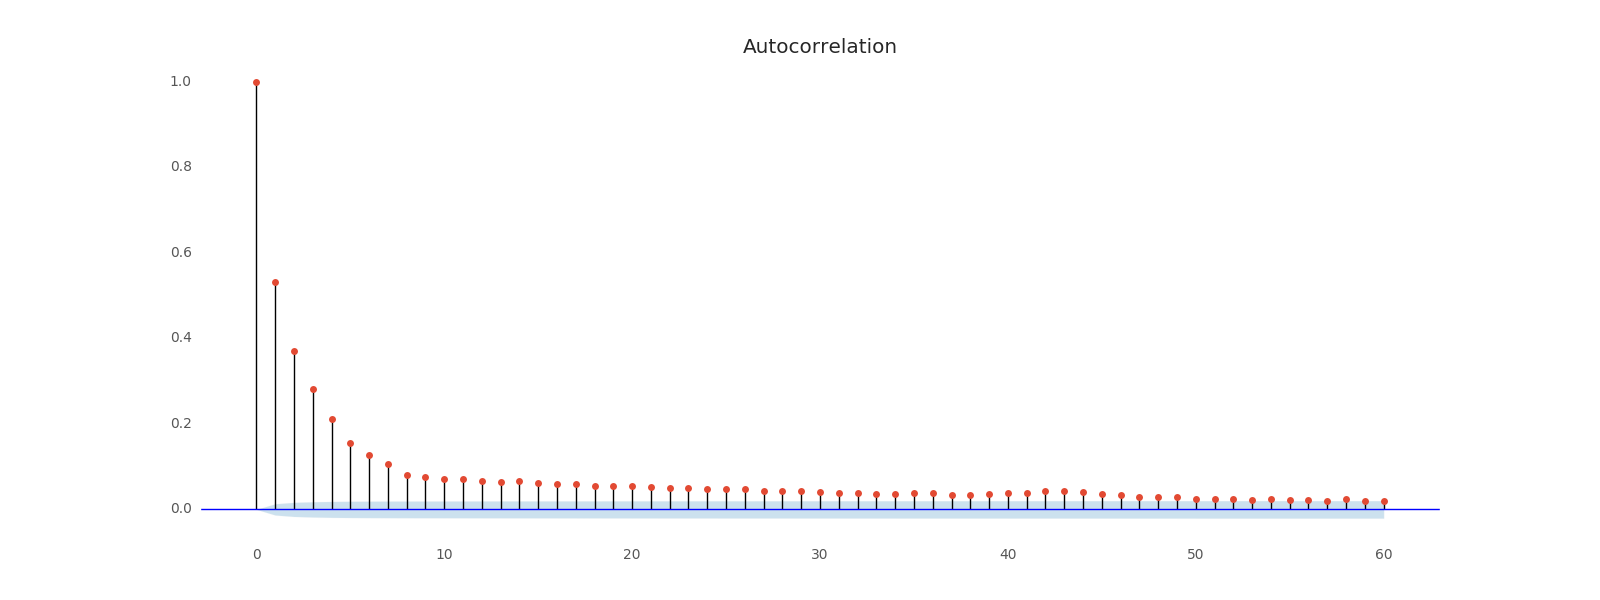

In [109]:
#ACF
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,6]
lag_acf = plot_acf(pandas_DFtraining, lags=60)
display(lag_acf)

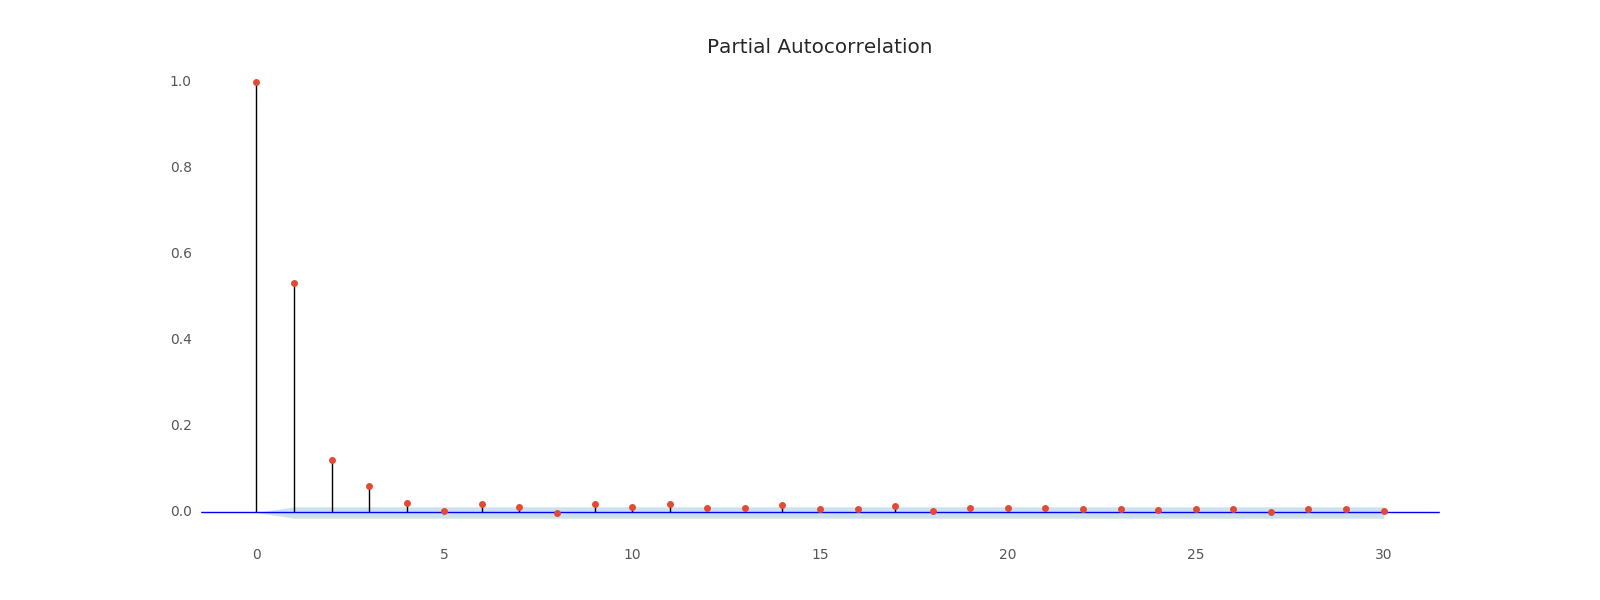

In [110]:
#PACF 
lag_pacf = plot_pacf(pandas_DFtraining, lags=30)
display(lag_pacf)

En la gráfica ACF se observa como la autocorrelación disminuye lentamente hasta integrarse en el intervalo de confianza. De la gráfica PACF se observa un corte abrupto del intervalo de confianza en lag=1, esto sugiere un modelo AR(1)

Aplicación del modelo ARIMA tipo (1,0,0) al conjunto de entrenamiento:

In [113]:
#import math
model = ARIMA(pandas_DFtraining.astype(float), order=(1, 0, 0))
results_ARIMA = model.fit(maxiter=500)  
print(results_ARIMA.summary())

ARMA Model Results 
==============================================================================
Dep. Variable: tiempoEspera No. Observations: 21977
Model: ARMA(1, 0) Log Likelihood -195326.867
Method: css-mle S.D. of innovations 1752.572
Date: Wed, 19 Dec 2018 AIC 390659.734
Time: 13:14:13 BIC 390683.727
Sample: 02-09-2017 HQIC 390667.548
 - 05-30-2017 
======================================================================================
 coef std err z P>|z| [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const 795.7924 25.308 31.444 0.000 746.189 845.396
ar.L1.tiempoEspera 0.5329 0.006 93.368 0.000 0.522 0.544
 Roots 
=============================================================================
 Real Imaginary Modulus Frequency
-----------------------------------------------------------------------------
AR.1 1.8765 +0.0000j 1.8765 0.0000
-----------------------------------------------------------------------------

Obtención y visualización de las prediciones del modelo sobre el conjunto de entrenamiento:

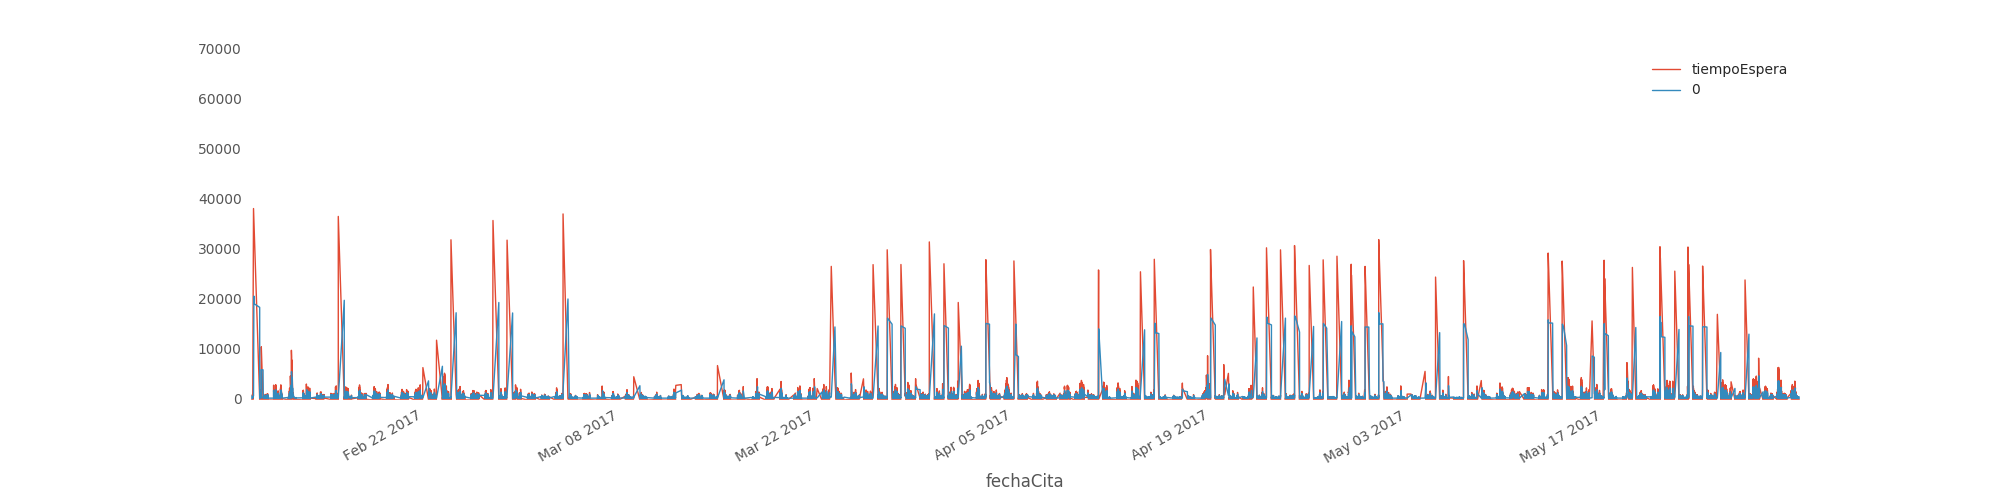

In [115]:
import math
# Predicciones sobre conjunto de entrenamiento
fitted_values  = results_ARIMA.predict() 
fitted_values_frame = fitted_values.to_frame()

# Visualización de predicciones sobre conjunto de entrenamiento
x = pandas_DFtraining.merge(fitted_values_frame, how='outer', left_index=True, right_index=True)
fig= x.plot(figsize=(20,5))
display(fig.figure)

Ejecución del modelo sobre el conjunto de test:

In [117]:
model_test = ARIMA(pandas_DFtest.astype(float), order=(1, 0, 0))
results_test_ARIMA = model_test.fit(maxiter=500) 

Obtención de las predicciones del modelo para el conjunto de test:

In [119]:
fitted_values_test  = results_test_ARIMA.predict()
fitted_values_test_frame = fitted_values_test.to_frame()

Visualización de las prediciones del modelo para el conjunto de test:

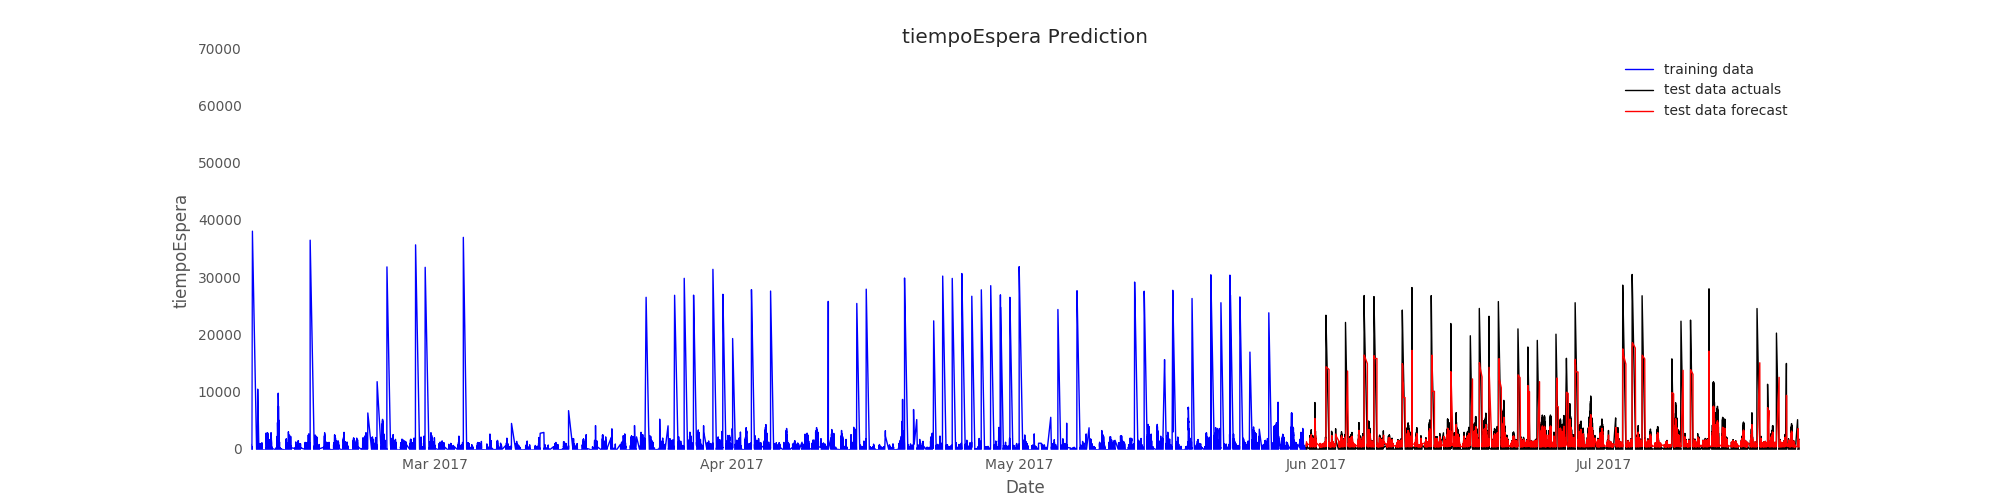

In [121]:
fig, ax = plt.subplots(figsize=(20,5))
ax.set(title='tiempoEspera Prediction', xlabel='Date', ylabel='tiempoEspera')
ax.plot(pandas_DFtraining, 'blue', label='training data') 
ax.plot(pandas_DFtest, 'black', label='test data actuals')
ax.plot(fitted_values_test_frame, 'r', label='test data forecast') 
legend = ax.legend(loc='upper right')
legend.get_frame().set_facecolor('w')
display(fig.figure)

Evaluación del modelo:

In [123]:
from math import sqrt
rmse = sqrt(mean_squared_error(pandas_DFtest, fitted_values_test))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1679.398

####8.0. Conclusión.

Durante este análisis exploratorio se ha intentado analizar como es el tiempo de espera de una cita para la oficina de Alicante. Previamente, para los datos importados correspondientes a las citas históricas con estado finalizado, se ha realizado un filtrado para eliminar idUsuario = 991 correspondiente a test y idServicio = 181 correspondiente a prueba.

La primera observación obtenida de la distribución del tiempo de espera en función del tiempo muestra una oscilación demasiado grande, con tiempos de espera máximos de 18h y tiempos mínimos de varios segundos. Se ha observado que este tipo de citas con altos tiempos de espera, son citas dadas para el día siguiente, por lo que puede que el tiempo de espera no sea el real de espera en la oficina.

Los datos estudiados corresponden al período correspondiente desde Febrero a Julio de 2017. El número de citas crece conforme se aproxima la temporada estival siendo Junio el mes pico en cuanto a número de citas.

Se ha encontrado que para la oficina de Alicante, existen 3 horas pico en cuanto al número de citas, correspondiente a las 10:00, 15:00 y 21:00 que pueden ser las horas de recogida y devolución de los vehículos. En lo referente a los días de la semana, el número de citas se va incrementando conforme avazanza la semana, permanceciendo estable en 6000 citas/día de Miércoles a Viernes alcanzándose el máximo número de citas el Domingo, que podría coincidir con la devolución de los vehículos alquilados durante la semana.

El servicio con mayores tiempos de espera corresponde al servicio 182 que corresponde a citas con reserva.

Los puestos 434 y 467 tienen tiempos de espera bastante superiores al resto de puestos de la oficina.

El usuario Pedro Gomez (idUsuario = 1107) es el que tiene unos tiempos de espera muy superiores al resto de usuarios.



En cuanto a los modelos empleados para la predicción del tiempo de espera, se han obtenido resultados algo superiores al tiempo medio de espera (tiempoEspera medio = 1102.32s) como error cuadrático medio en la predicción. Para ellos se han empleadolos modelos de regresión ofrecidos por la librería de Pyspark ML, un modelo de regresión de redes neuronales y un modelo autorregresivo ARIMA con los siguientes resultados medidos en RMSE:

*RMSE obtenido:*
- Modelo Lineal Regression: 1955.41
- Modelo Decision Trees: 2012.14
- Modelo Random Forest: 1401.26
- Modelo Gradient Boosted Tress: 1869.25
- Modelo Neural Network Regression: 2162.57
- Modelo ARIMA: 1679.39